In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=[15,8]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE

In [3]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 10)

- There are 14999 rows and 10 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Checking the datatype

In [6]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

- All the datatypes are assigned correctly except `promotion_last_5years`, `Work_accident`. These are labelled as int64, but actually this should be a categorical variable. 

In [7]:
df.Work_accident = df.Work_accident.astype('object')
df.promotion_last_5years = df.promotion_last_5years.astype('object')

In [8]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident             object
left                       int64
promotion_last_5years     object
sales                     object
salary                    object
dtype: object

### Data correction

In [9]:
df.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

- Here,  the column name dept has been wrongly entered as sales. We can rename it as dept.

In [10]:
df.rename({'sales':'dept'}, axis =1, inplace = True)

In [11]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [12]:
df.dept.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

- The IT and support comes under technical team, so we can replace the values of IT and support with technical.

In [13]:
df.dept = np.where(df.dept=='IT', 'technical', df.dept)
df.dept = np.where(df.dept=='support', 'technical', df.dept)
df.dept.value_counts()

technical      6176
sales          4140
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

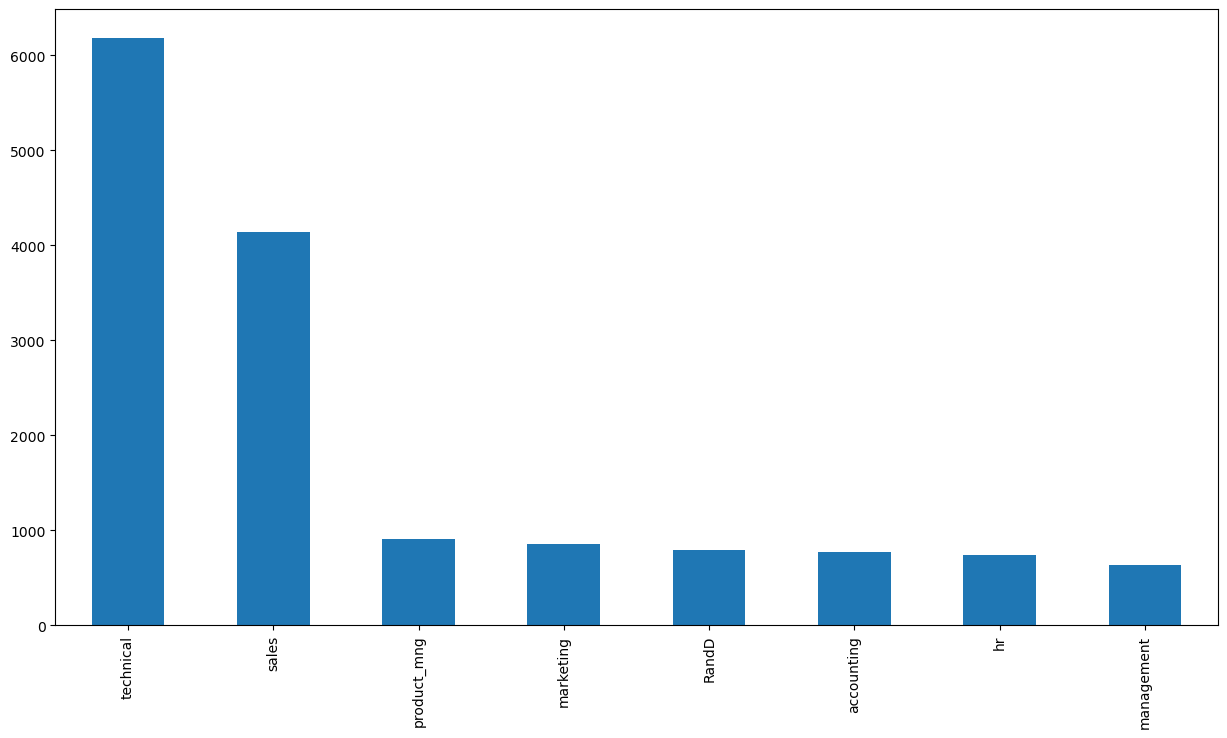

In [14]:
df.dept.value_counts().plot(kind = 'bar')
plt.show()

- We can observe that there are many people under technical and sales team.

### Distribution of the variables

In [15]:
#Firstly lets check the distribution of all the variables.

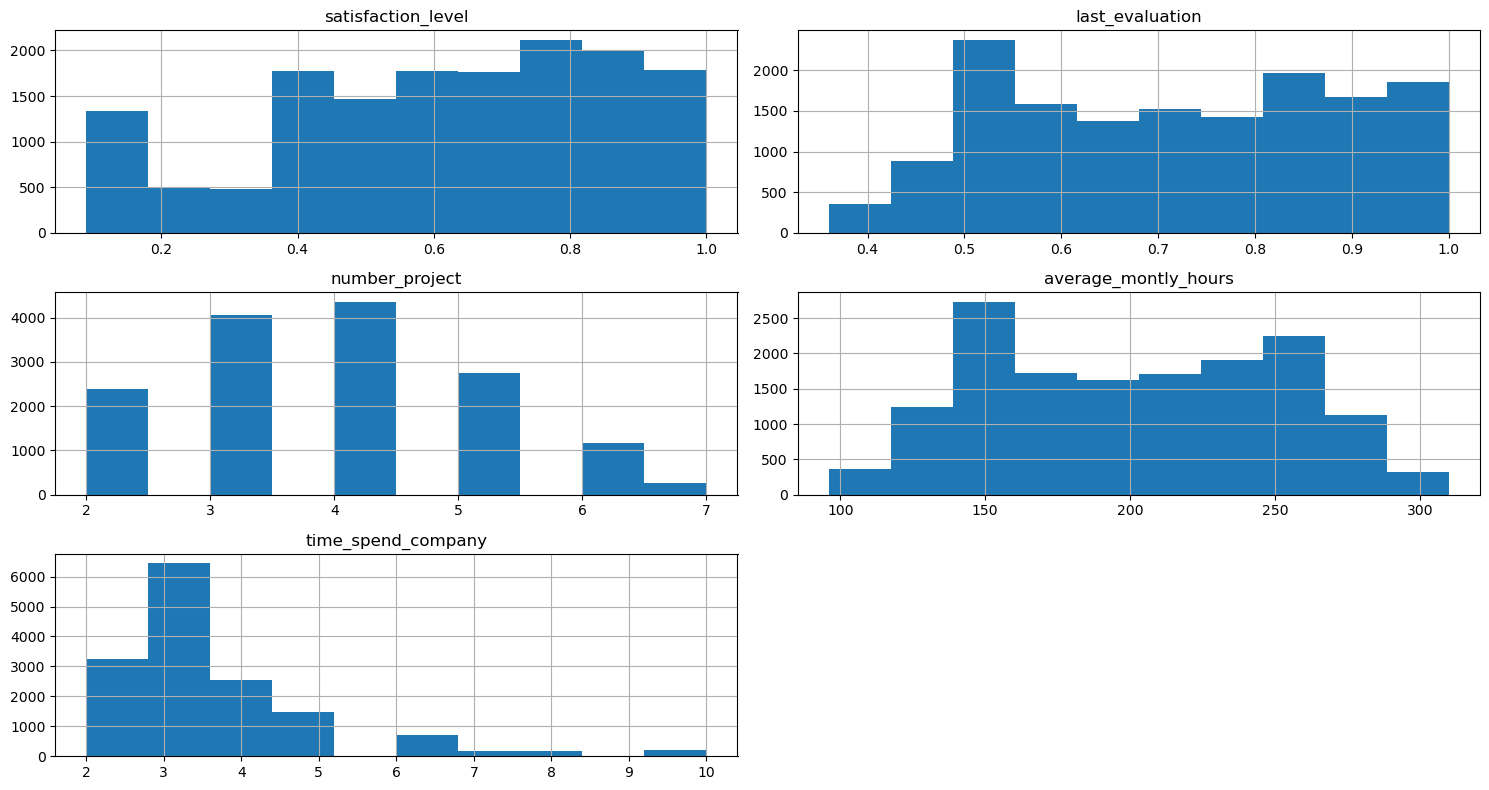

Skewness:


satisfaction_level     -0.476360
last_evaluation        -0.026622
number_project          0.337706
average_montly_hours    0.052842
time_spend_company      1.853319
dtype: float64

In [16]:
df.drop('left', axis = 1).hist()
plt.tight_layout()
plt.show()  
print('Skewness:')
df.drop(['left','Work_accident', 'promotion_last_5years'], axis = 1).skew()

- We can say that only time spend company is positively skewed, remaining variables follow almost the normal distribution.

###  Analyze the Target Variable

In [17]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

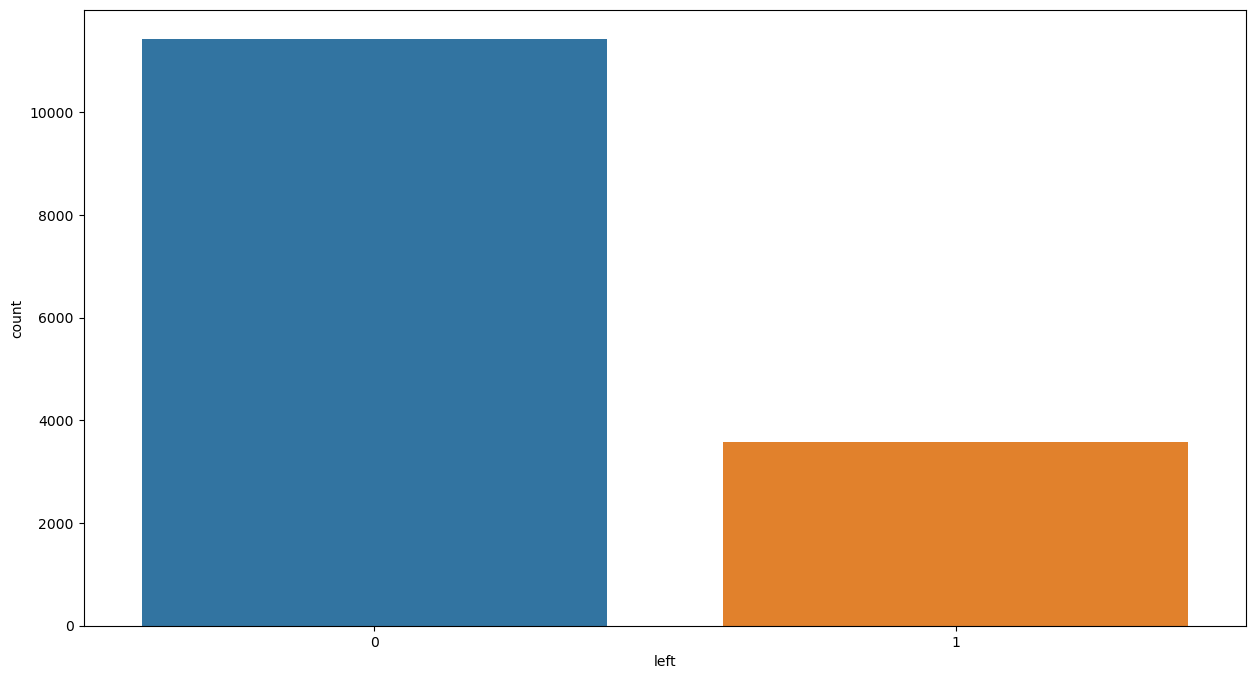

In [18]:
sns.countplot(x = df.left)
plt.show()

In [19]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
left,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032
1,0.440098,0.718113,3.855503,207.419210,3.876505


`Inefernce`: `0` means `no` and `1` means `yes`; Many people did not leave the company becz the satisfaction level was good and all the remaining other values more or less the same. 

### Summary Statistics

In [20]:
df_num = df.select_dtypes(include = ['number'])
df_num.drop('left', axis =1).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


- We can observe that data seems to be correct and no redundancy in the data. For every column, we have acceptable mean values.

In [21]:
df_cat = df.select_dtypes(include = 'O')
df_cat.describe()

,Work_accident,promotion_last_5years,dept,salary
count,14999,14999,14999,14999
unique,2,2,8,3
top,0,0,technical,low
freq,12830,14680,6176,7316


`0` means `no` and `1` means `yes`, which means we can say that we have dont see maximum promotions in the last 5 years and also the work accident. And also max of the people are getting low salaries.

### Missing Values

In [22]:
Total = df.isnull().sum().sort_values(ascending=False)          
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
satisfaction_level,0,0.0
last_evaluation,0,0.0
number_project,0,0.0
average_montly_hours,0,0.0
time_spend_company,0,0.0
Work_accident,0,0.0
left,0,0.0
promotion_last_5years,0,0.0
dept,0,0.0
salary,0,0.0


In [23]:
#No missing Values in the data.

### Analyze the categorical variables

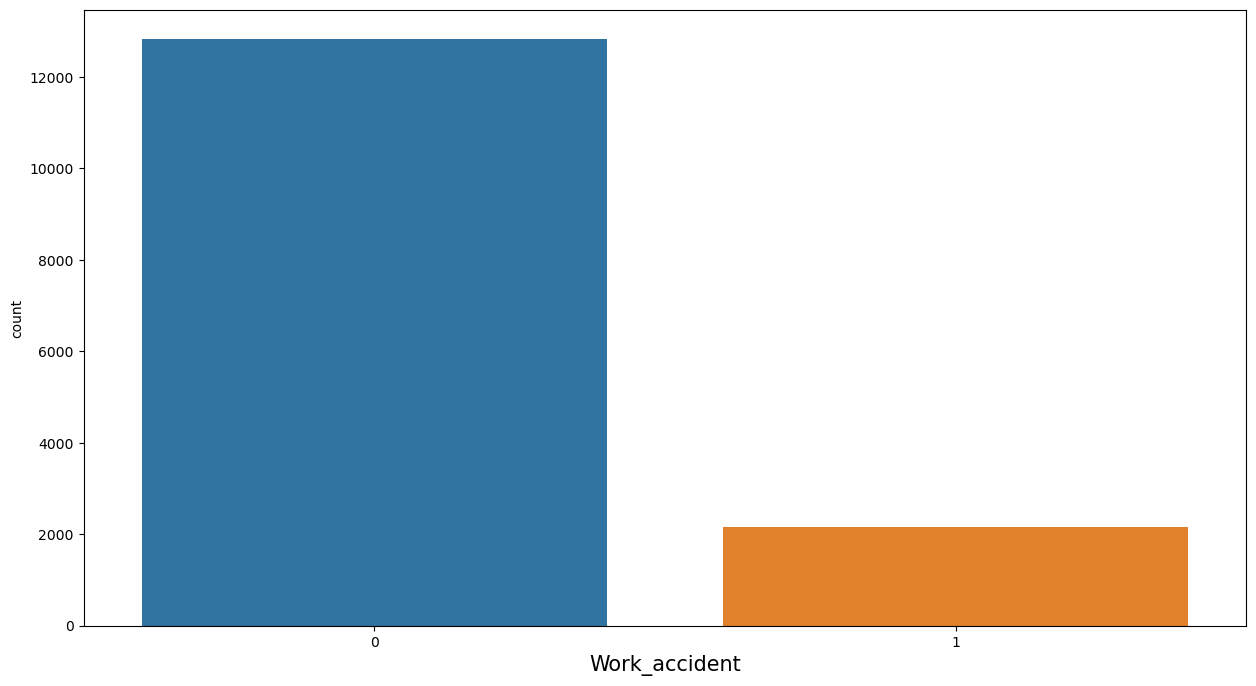

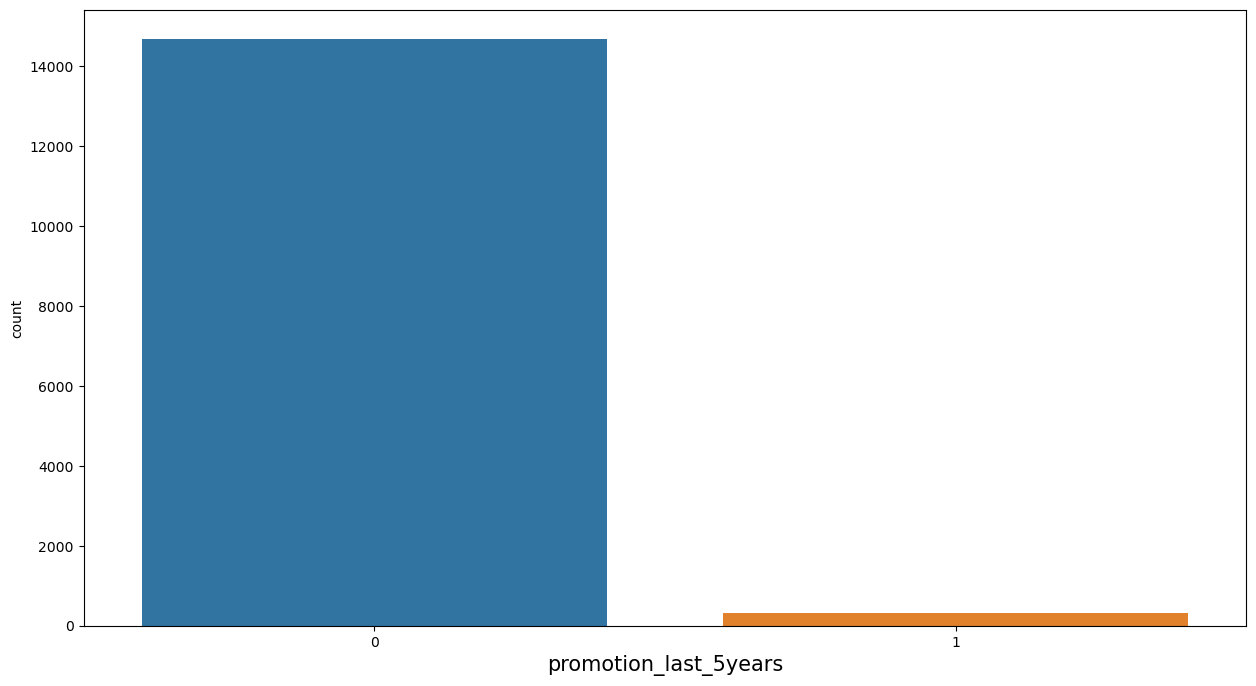

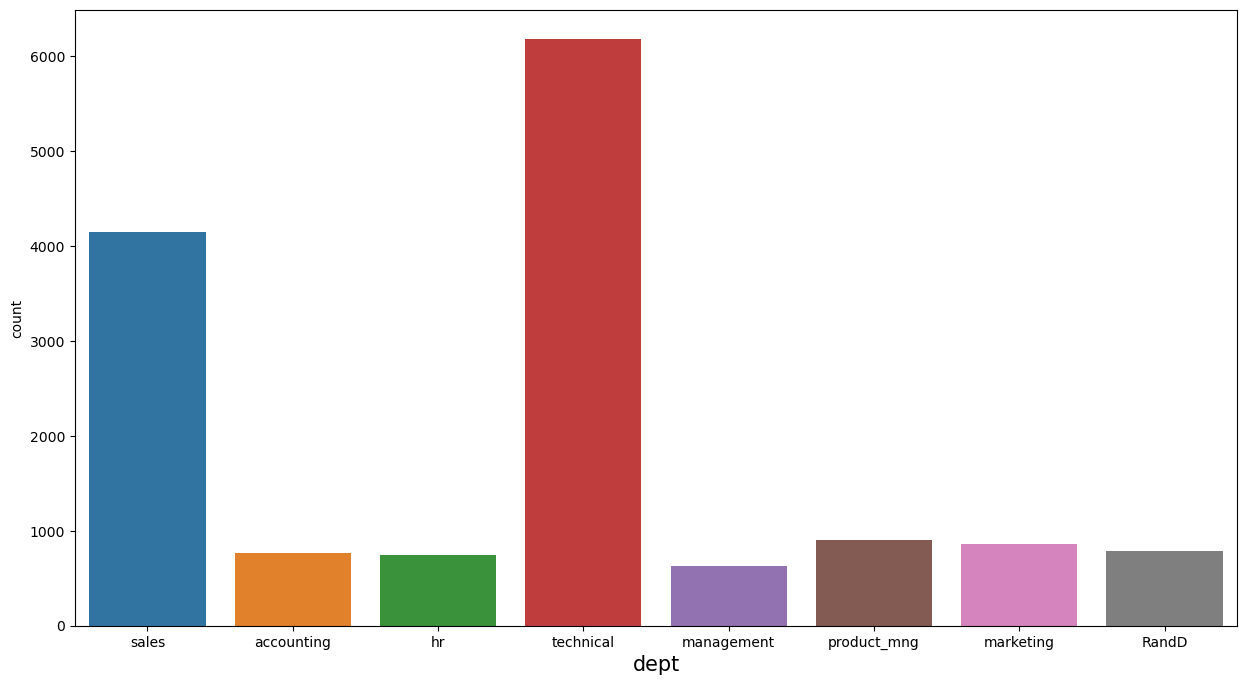

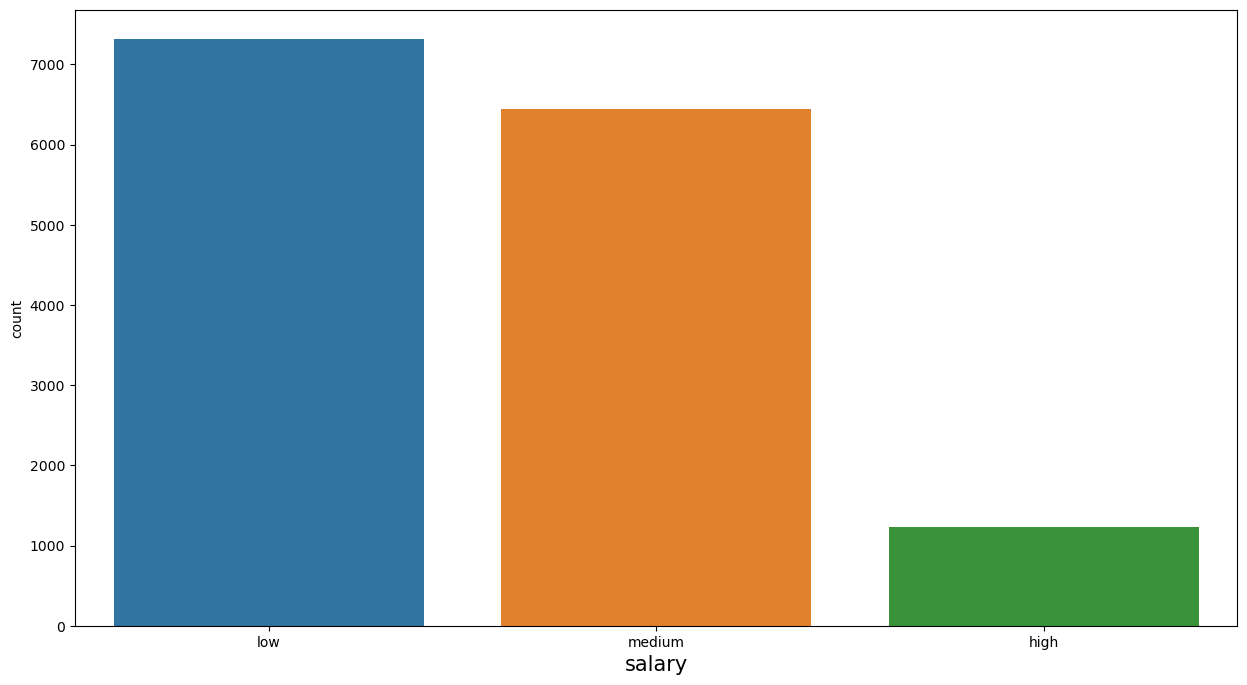

In [24]:
for i in df_cat.columns:
    sns.countplot(x = df[i])
    plt.xlabel(i, fontsize = 15)
    plt.show()

- We observed the same values when we applied the summary statistics.

In [25]:
df.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left
salary,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.066289
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.296884
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.204313


In [26]:
df.groupby('dept').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left
dept,,,,,,
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.153748
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.265971
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.290934
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.144444
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.236597
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.219512
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.244928
technical,0.613687,0.720976,3.839054,201.813795,3.416127,0.246924


- R and D deot has the highest Satisfaction level in the company.

### Analyze relationship between target variable and categorical variables

In [27]:
#Lets see the statistics between the left and dept column.
pd.crosstab(df.dept, df.left)

left,0,1
dept,,
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
technical,4651,1525


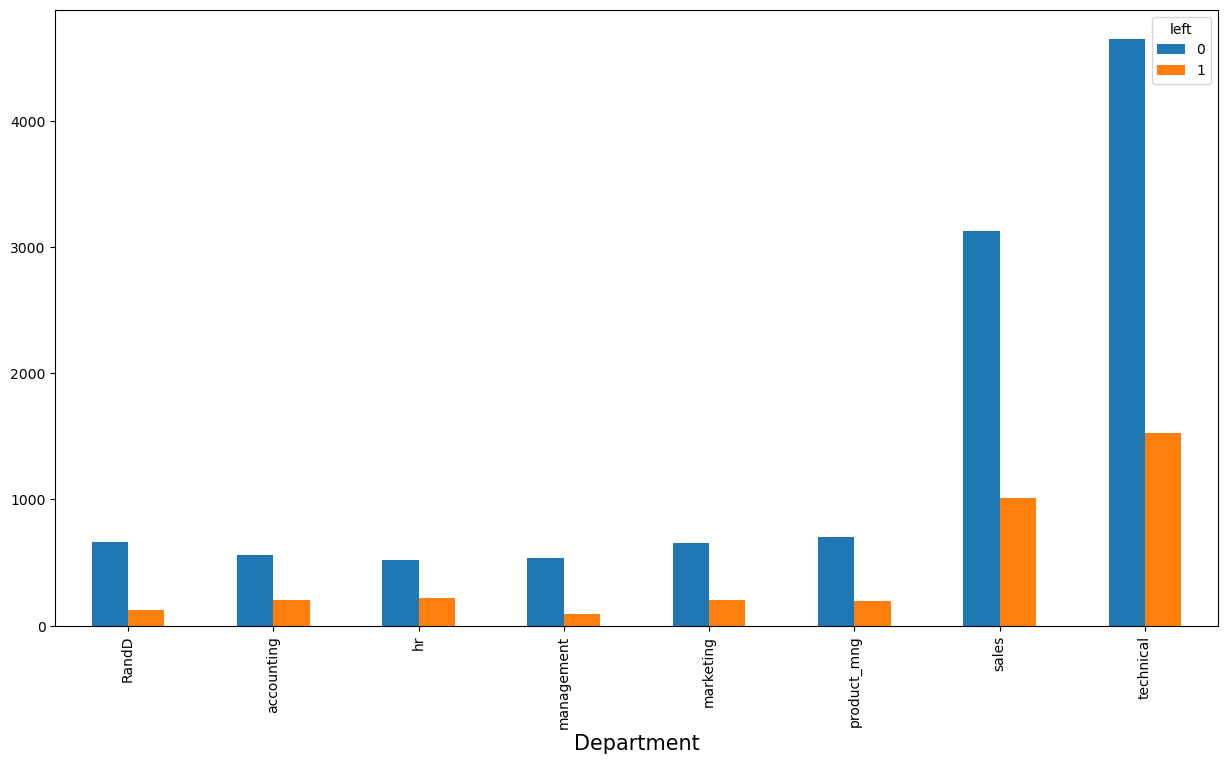

In [28]:
pd.crosstab(df.dept, df.left).plot(kind = 'bar')
plt.xlabel('Department', fontsize = 15)
plt.show()

- For all the departments, we have more number of people who do not leave the company.

In [29]:
pd.crosstab(df.salary, df.left)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


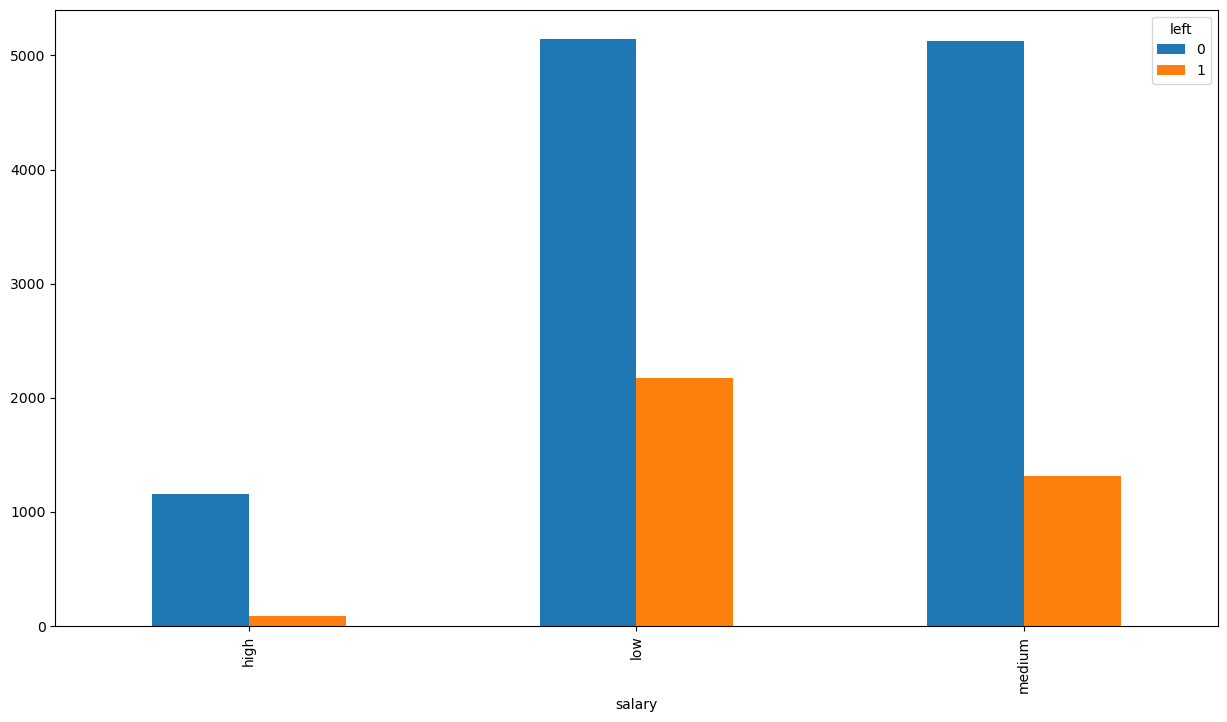

In [30]:
pd.crosstab(df.salary, df.left).plot(kind = 'bar')
plt.show()

- As usual, we can relate that people who have low salary has the maximum tendancy to leave the company.

### Outliers

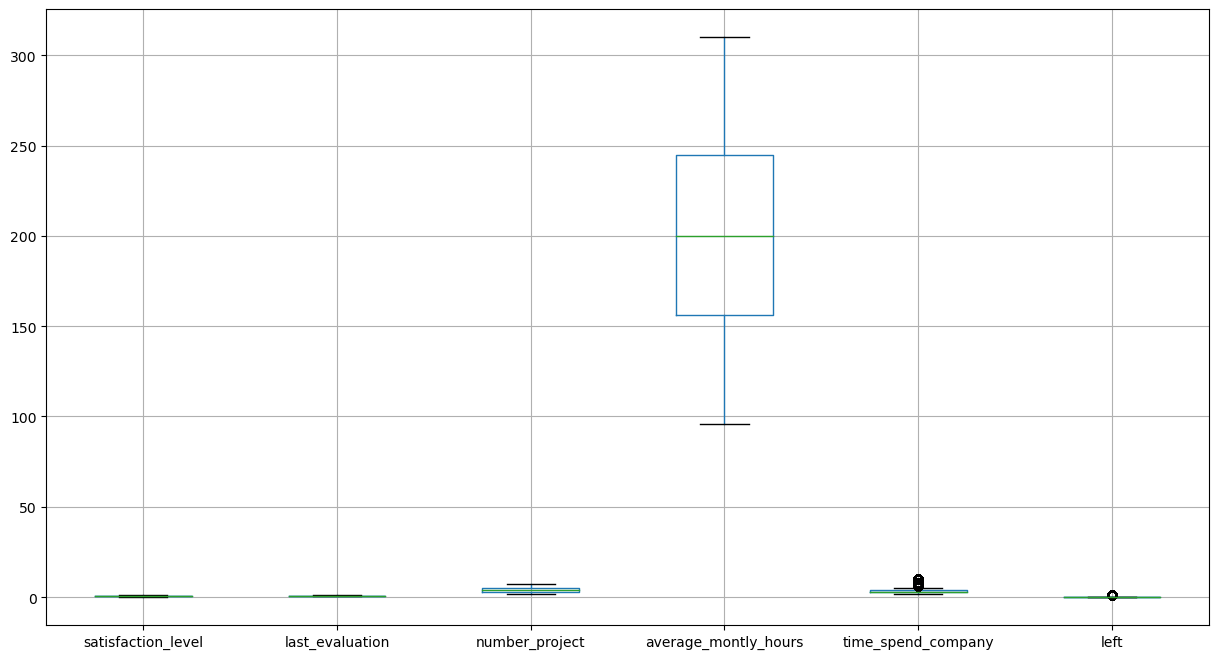

In [31]:
df.boxplot();

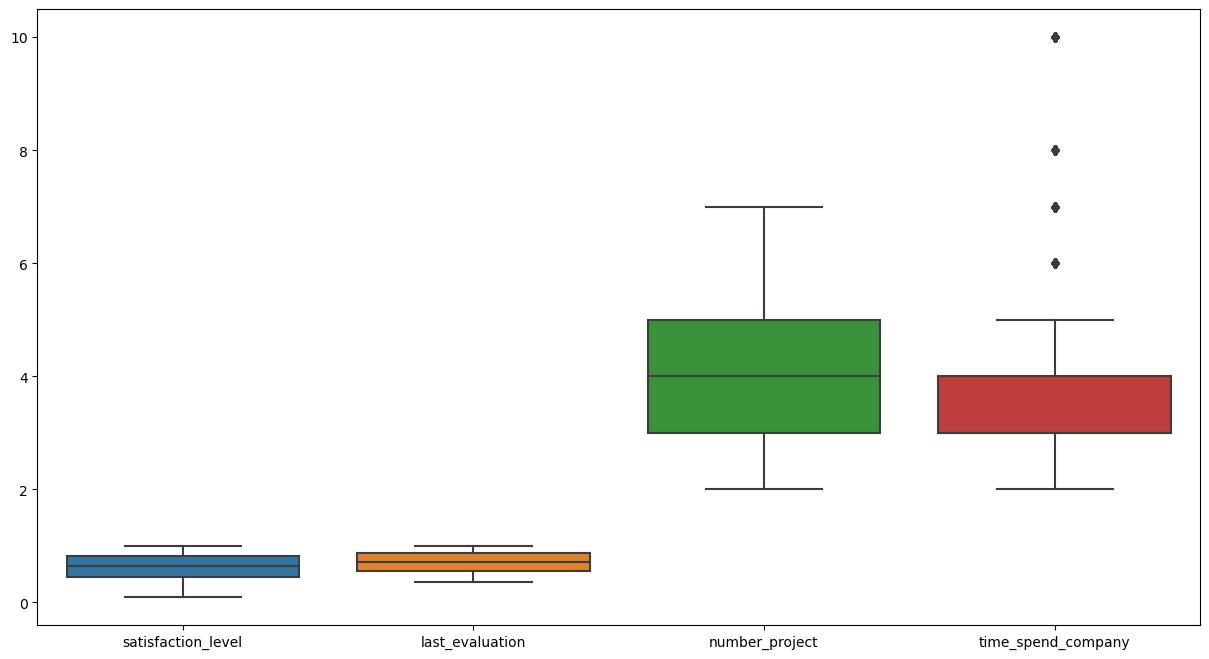

In [32]:
sns.boxplot(df.drop(['average_montly_hours','Work_accident', 'left',
       'promotion_last_5years'], axis = 1));

- We can say that there are only few outliers in time spend company column.
- In satisfaction level and last eveluation columns, the values are more concentrated near the value 1, but for number project, time spend company are concentrated near 4, 5.

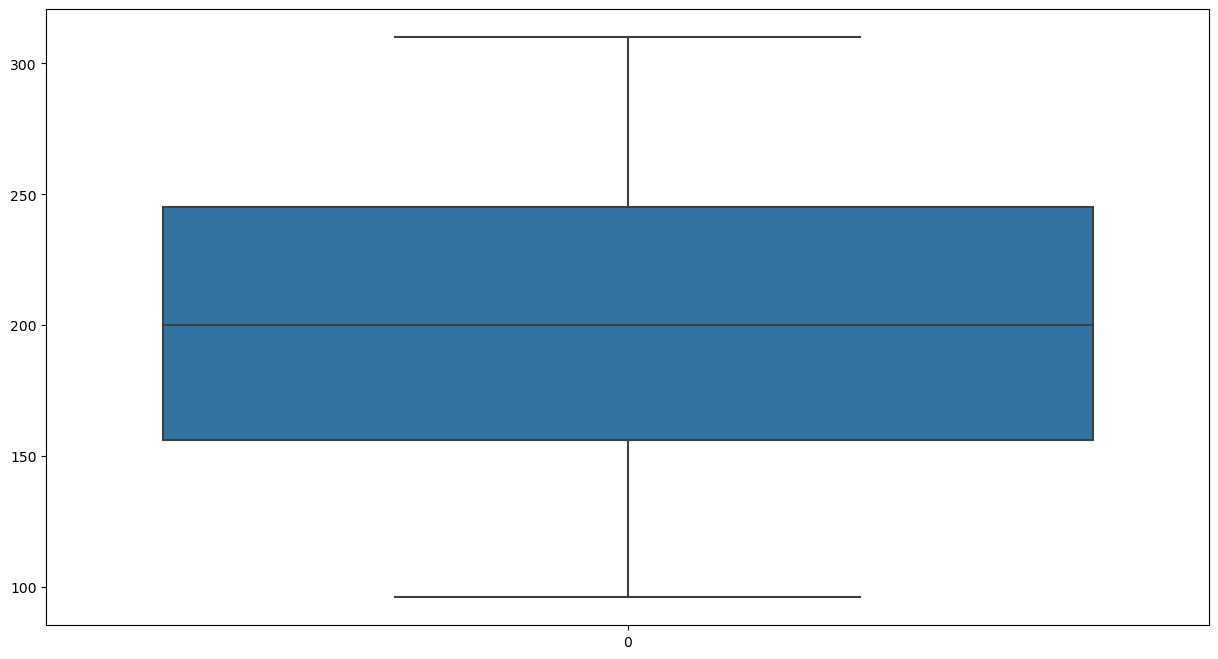

In [33]:
sns.boxplot(df.average_montly_hours);

### Correlation

In [34]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,-0.388375
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,0.006567
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,0.023787
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,0.071287
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.144822
left,-0.388375,0.006567,0.023787,0.071287,0.144822,1.000000


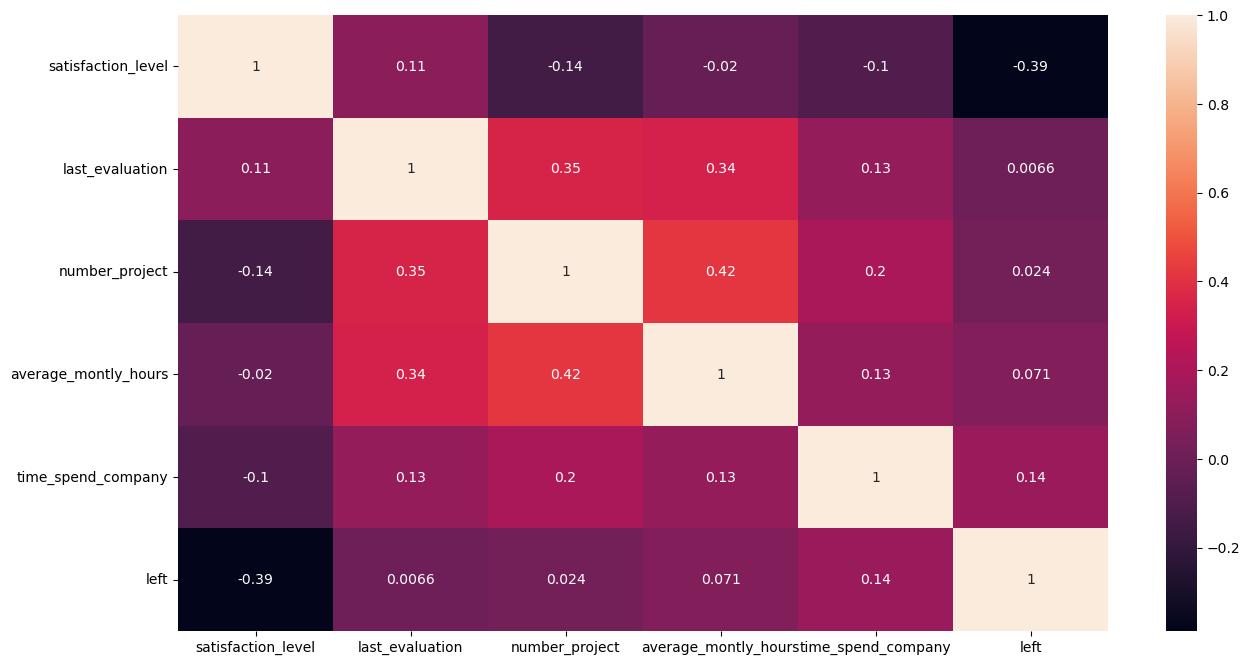

In [35]:
sns.heatmap(df.corr(), annot = True)
plt.show()

- We can see there is little negative correlation between the satisfaction level and the target column `left`.

### Dummy encoding the categorical variables

In [36]:
df_feature = df.drop('left', axis = 1)

In [37]:
df_target = df['left']

In [38]:
df_num = df_feature.select_dtypes(include = np.number)
df_num.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6


In [39]:
df_cat = df_feature.select_dtypes(include = 'O')
df_cat.head(2)

,Work_accident,promotion_last_5years,dept,salary
0,0,0,sales,low
1,0,0,sales,medium


In [40]:
#Lets create the dummy variables for the categorical variables.
dummy_var = pd.get_dummies(df_cat, drop_first = True)
dummy_var.head(2)

,Work_accident_1,promotion_last_5years_1,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_technical,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,1,0,0,1


### Scale the data

In [41]:
#lets scale the data for the numerical data.
#Lets use the StandardScaler.

X_scaler = StandardScaler()
num_scaled = X_scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

df_num_scaled.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235
1,0.752814,0.840707,0.971113,1.220423,1.713436


In [42]:
# Concating the scaled values and the dummy variables.
X = pd.concat([df_num_scaled, dummy_var], axis =1 )
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident_1,promotion_last_5years_1,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_technical,salary_low,salary_medium
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,0,0,0,0,0,0,0,1,0,1,0
1,0.752814,0.840707,0.971113,1.220423,1.713436,0,0,0,0,0,0,0,1,0,0,1
2,-2.022479,0.957554,2.593763,1.420657,0.343655,0,0,0,0,0,0,0,1,0,0,1
3,0.431041,0.899131,0.971113,0.439508,1.028546,0,0,0,0,0,0,0,1,0,1,0
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,0,0,0,0,0,0,0,1,0,1,0


In [43]:
#initializing the target variable.
y = df_target

### Train test split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (11999, 16)
y_train (11999,)
X_test (3000, 16)
y_test (3000,)


### Logistic Regression

In [45]:
# Lets build the logistic regression model.
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression()

In [46]:
# Training accuracy
logreg.score(X_train, y_train)

0.7899824985415451

In [47]:
# Testing accuracy
logreg.score(X_test, y_test)

0.784

- With the above scores, we can say that there is hardly any overfitting.

In [48]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

### Confusion Matrix

In [49]:
#Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[2117,  177],
       [ 471,  235]])

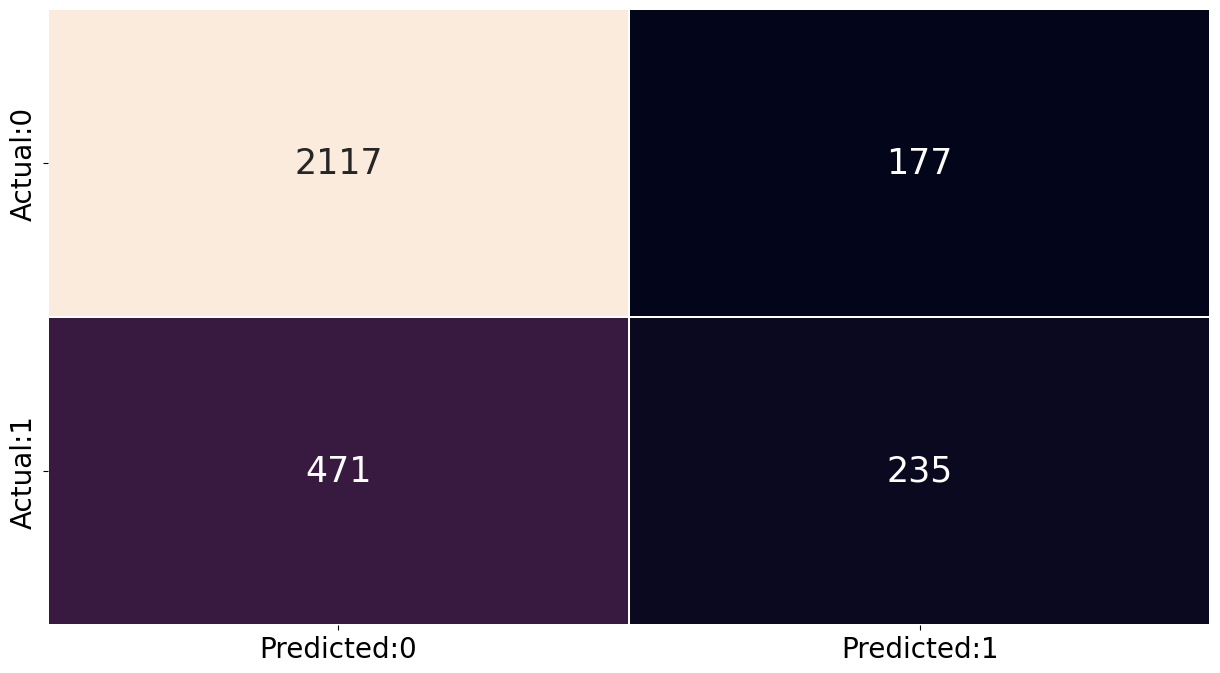

In [50]:
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

- TN = 2117
- TP = 235
- FP = 177
- FN = 471

- There are many False Negatives in the data. 

In [51]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [52]:
# calculate the precision value
precision = TP / (TP+FP)

precision

0.5703883495145631

- Poor Precision value as well, which means the person did not leave the company but technically showing as the person left the company.

In [53]:
# calculate the recall value
recall = TP / (TP+FN)

recall

0.3328611898016997

- Since there are many False nagatives in the data, there is very low recall value, which means low sensitivity. Sensitivity technically should be high, ie we should have a good sensitivity value but Because of low False negatives, we are getting it too low, which states that the person has left the company but it has been recorded as the person not leaving the company.

### Classification Report

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.57      0.33      0.42       706

    accuracy                           0.78      3000
   macro avg       0.69      0.63      0.64      3000
weighted avg       0.76      0.78      0.76      3000



`Inference` 
- f1 score value is 0.78. F1 score is the harmonic mean of precision and recall.
- The above model was built using all the features. Now lets try to select important features and build a Logistic Regression model on that. We shall use RFE method to select the important features. 

### RFE Model

In [55]:
rfe_model = RFE(estimator=logreg, n_features_to_select=5)
rfe_model = rfe_model.fit(X_train, y_train)

In [56]:
rfe_model

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [57]:
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print(signi_feat_rfe)

Index(['satisfaction_level', 'Work_accident_1', 'promotion_last_5years_1',
       'salary_low', 'salary_medium'],
      dtype='object')


- So,  the 7 important features are 'satisfaction_level', 'Work_accident_1', 'promotion_last_5years_1',
       'dept_hr', 'dept_marketing', 'salary_low', 'salary_medium'
       
- We shall build a model using these features.

In [58]:
X_train_rfe = X_train[['satisfaction_level', 'Work_accident_1', 'promotion_last_5years_1',
       'salary_low', 'salary_medium']]
X_train_rfe.head(2)

,satisfaction_level,Work_accident_1,promotion_last_5years_1,salary_low,salary_medium
9838,1.557247,0,0,1,0
7689,-1.821371,0,0,0,0


In [59]:
X_test_rfe = X_test[['satisfaction_level', 'Work_accident_1', 'promotion_last_5years_1',
       'salary_low', 'salary_medium']]
X_test_rfe.head(2)

,satisfaction_level,Work_accident_1,promotion_last_5years_1,salary_low,salary_medium
6723,0.149490,1,0,0,1
6473,1.074587,0,0,1,0


In [60]:
logreg.fit(X_train_rfe, y_train)

LogisticRegression()

In [61]:
#Test score
logreg.score(X_test_rfe, y_test)

0.7736666666666666

In [62]:
#Train score
logreg.score(X_train_rfe, y_train)

0.7854821235102926

- No overfitting in the data.

In [63]:
y_pred_rfe = logreg.predict(X_test_rfe)
y_pred_rfe

array([0, 0, 0, ..., 0, 0, 1])

In [64]:
cm = confusion_matrix(y_test, y_pred_rfe)
cm

array([[2131,  163],
       [ 516,  190]])

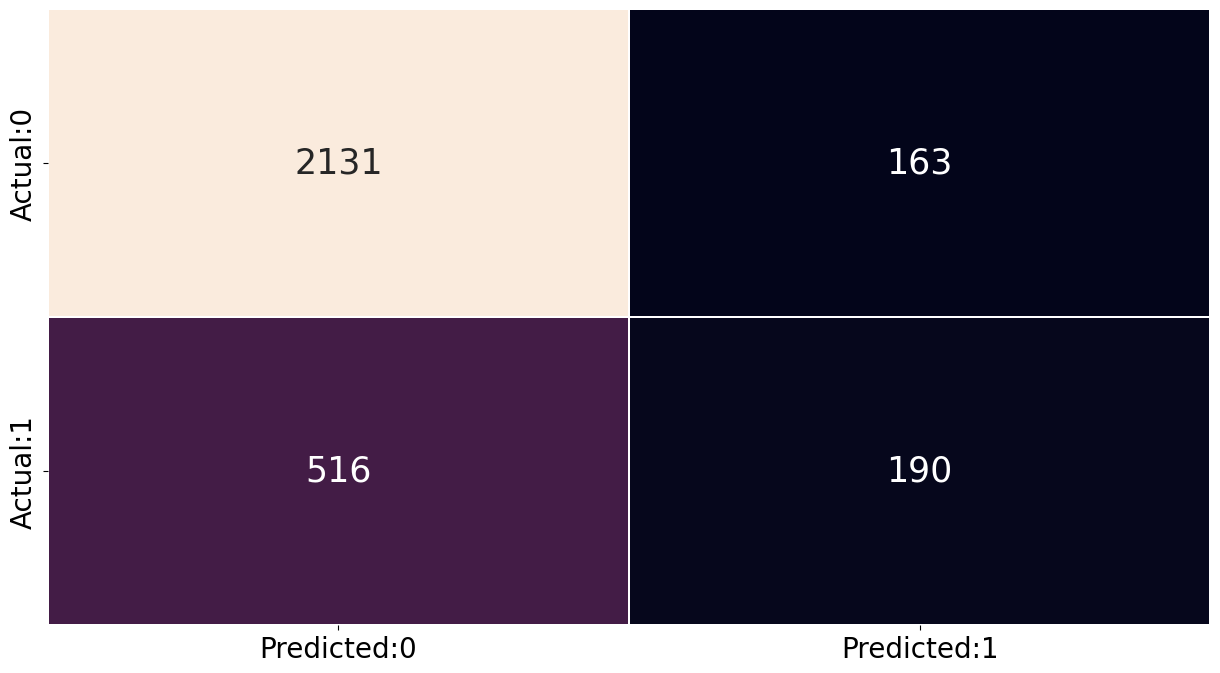

In [65]:
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

- Values are more less the same for the full model and the for the model built on the important features using RFE.

In [66]:
print(classification_report(y_test, y_pred_rfe))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      2294
           1       0.54      0.27      0.36       706

    accuracy                           0.77      3000
   macro avg       0.67      0.60      0.61      3000
weighted avg       0.74      0.77      0.74      3000

